In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
df_rot = pd.read_csv('../results/RC6F5/RC6F5_C2CH2_vdw.5/RC6F5_C2CH2_rotation_structures_not_mirrored.csv')
df_rot_mir = pd.read_csv('../results/RC6F5/RC6F5_C2CH2_vdw.5/RC6F5_C2CH2_rotation_structures.csv')

df_rot_1243 = pd.read_csv('../results/RC6F5/RC6F5_C2CH2_vdw.5/RC6F5_C2CH2_rotation_structures_12-4-3.csv')

df_kab = pd.read_csv('../results/RC6F5/RC6F5_C2CH2_vdw.5/RC6F5_C2CH2_kabsch_structures_not_mirrored.csv')
df_kab_mir = pd.read_csv('../results/RC6F5/RC6F5_C2CH2_vdw.5/RC6F5_C2CH2_kabsch_structures.csv')

<AxesSubplot:>

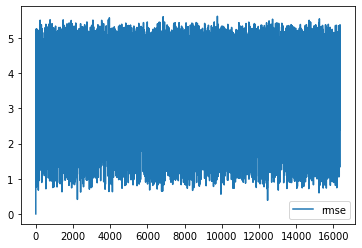

In [6]:
df_rot.plot()

<AxesSubplot:>

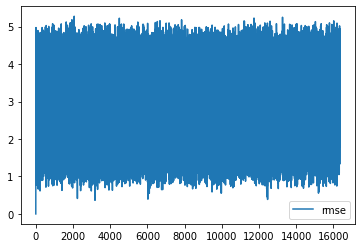

In [7]:
df_rot_mir.plot()

<AxesSubplot:>

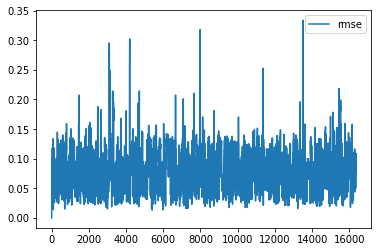

In [8]:
df_kab.plot()

<AxesSubplot:>

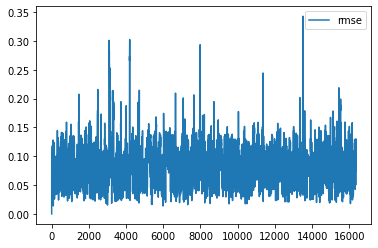

In [9]:
df_kab_mir.plot()

In [85]:
print(df_rot.rmse.mean())
print(df_rot_mir.rmse.mean())
print(df_rot_1243.rmse.mean())

print(df_kab.rmse.mean())
print(df_kab_mir.rmse.mean())

3.6115222723462725
2.9093305634773743
2.888225971246134
0.08417891299556067
0.08747537104099122


In [76]:
# use a smoothing algorithm
df_rot['rmse_smooth'] = df_rot.iloc[:,1].rolling(window=200).mean()
df_rot_mir['rmse_smooth'] = df_rot_mir.iloc[:,1].rolling(window=200).mean()

df_rot_1243['rmse_smooth'] = df_rot_1243.iloc[:,1].rolling(window=200).mean()

df_kab['rmse_smooth'] = df_kab.iloc[:,1].rolling(window=200).mean()
df_kab_mir['rmse_smooth'] = df_kab_mir.iloc[:,1].rolling(window=200).mean()

display(df_rot_1243)


,structure_id,rmse,mirrored,rsme_smooth,rmse_smooth
0,BUFJIY,0.000000,True,NaN,NaN
1,BUFJIY,3.012087,False,NaN,NaN
2,BUFJIY,1.154436,True,NaN,NaN
3,CUDCUC,3.267814,False,NaN,NaN
4,DUCMIA,3.511364,False,NaN,NaN
...,...,...,...,...,...
16359,ZUMMOM,3.519407,False,3.047920,3.047920
16360,ZUMMOM,3.052467,False,3.056100,3.056100
16361,ZUMMOM,2.796277,False,3.054829,3.054829
16362,ZUMMOM,4.168374,False,3.054201,3.054201


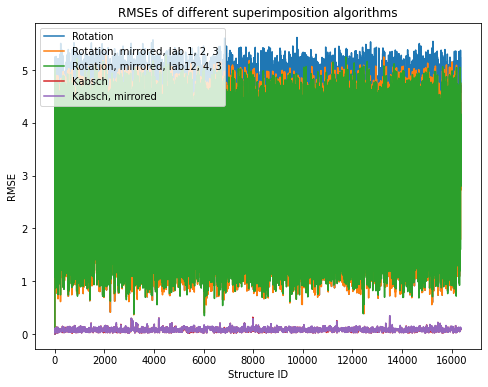

In [79]:
plt.figure(figsize=(8,6))
plt.title('RMSEs of different superimposition algorithms')

plt.plot(range(0, len(df_rot)), df_rot.rmse, label='Rotation')
plt.plot(range(0, len(df_rot_mir)), df_rot_mir.rmse, label="Rotation, mirrored, lab 1, 2, 3")
plt.plot(range(0, len(df_rot_1243)), df_rot_1243.rmse, label="Rotation, mirrored, lab12, 4, 3")

plt.plot(range(0, len(df_kab)), df_kab.rmse, label='Kabsch')
plt.plot(range(0, len(df_kab_mir)), df_kab_mir.rmse, label='Kabsch, mirrored')

plt.legend()
plt.xlabel("Structure ID")
plt.ylabel("RMSE")

plt.show()

,structure_id,rmse,mirrored,rsme_smooth,rmse_smooth
0,BUFJIY,0.000000,True,NaN,NaN
1,BUFJIY,3.012087,False,NaN,NaN
2,BUFJIY,1.154436,True,NaN,NaN
3,CUDCUC,3.267814,False,NaN,NaN
4,DUCMIA,3.511364,False,NaN,NaN
...,...,...,...,...,...
16359,ZUMMOM,3.519407,False,3.047920,3.047920
16360,ZUMMOM,3.052467,False,3.056100,3.056100
16361,ZUMMOM,2.796277,False,3.054829,3.054829
16362,ZUMMOM,4.168374,False,3.054201,3.054201


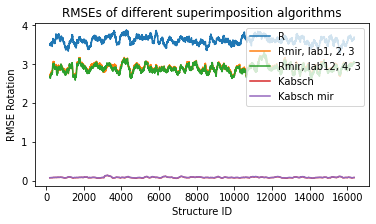

In [82]:
display(df_rot_1243)

plt.figure(figsize=(6,3))
plt.title('RMSEs of different superimposition algorithms')

plt.plot(range(0, len(df_rot)), df_rot.rmse_smooth, label='R')
plt.plot(range(0, len(df_rot_mir)), df_rot_mir.rmse_smooth, label="Rmir, lab1, 2, 3")
plt.plot(range(0, len(df_rot_1243)), df_rot_1243.rmse_smooth, label='Rmir, lab12, 4, 3')
plt.legend()

plt.ylabel("RMSE Rotation")
plt.xlabel("Structure ID")

plt.plot(range(0, len(df_kab)), df_kab.rmse_smooth, label='Kabsch', color='tab:red')
plt.plot(range(0, len(df_kab_mir)), df_kab_mir.rmse_smooth, label='Kabsch mir', color='tab:purple')
plt.legend(loc='upper right')


plt.show()

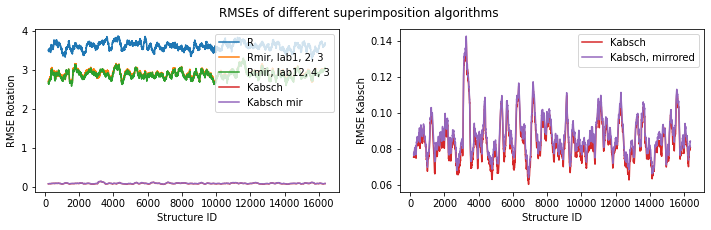

In [89]:
# make the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,3))
# fig.tight_layout()
fig.suptitle('RMSEs of different superimposition algorithms')


ax1.plot(range(0, len(df_rot)), df_rot.rmse_smooth, label='R')
ax1.plot(range(0, len(df_rot_mir)), df_rot_mir.rmse_smooth, label="Rmir, lab1, 2, 3")
ax1.plot(range(0, len(df_rot_1243)), df_rot_1243.rmse_smooth, label='Rmir, lab12, 4, 3')
ax1.plot(range(0, len(df_kab)), df_kab.rmse_smooth, label='Kabsch', color='tab:red')
ax1.plot(range(0, len(df_kab_mir)), df_kab_mir.rmse_smooth, label='Kabsch mir', color='tab:purple')

ax1.set_xlabel("Structure ID")
ax1.set_ylabel("RMSE Rotation")

ax1.legend(loc='upper right')



ax2.plot(range(0, len(df_kab)), df_kab.rmse_smooth, label='Kabsch', color='tab:red')
ax2.plot(range(0, len(df_kab_mir)), df_kab_mir.rmse_smooth, label='Kabsch, mirrored', color='tab:purple')


ax2.set_xlabel("Structure ID")
ax2.set_ylabel("RMSE Kabsch")

ax2.legend(loc='upper right')



plt.savefig('../results/figures/comparing_rmse.svg', format='svg', bbox_inches='tight')

Text(0.5, 0, 'Fragment id')

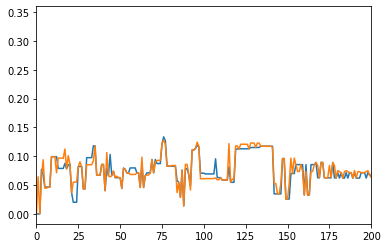

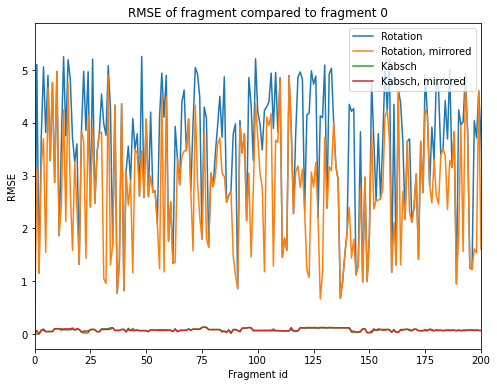

In [17]:
plt.plot(range(0, len(df_kab)), df_kab.rmse)
plt.plot(range(0, len(df_kab_mir)), df_kab_mir.rmse)

plt.xlim(0, 200)

plt.figure(figsize=(8,6))
plt.plot(range(0, len(df_rot)), df_rot.rmse, label='Rotation')
plt.plot(range(0, len(df_rot_mir)), df_rot_mir.rmse, label="Rotation, mirrored")

plt.plot(range(0, len(df_kab)), df_kab.rmse, label='Kabsch')
plt.plot(range(0, len(df_kab_mir)), df_kab_mir.rmse, label='Kabsch, mirrored')
plt.xlim(0, 200)

plt.legend()
plt.title("RMSE of fragment compared to fragment 0")
plt.ylabel("RMSE")
plt.xlabel("Fragment id")

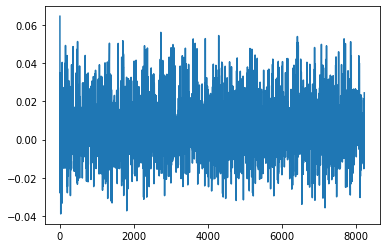

In [9]:
df['rmse_diff'] = df_mir.rmse - df.rmse

sliced_df = df[df.rmse_diff != 0]

plt.figure()
plt.plot(range(0, len(sliced_df)), sliced_df.rmse_diff)


sliced_df2 = df[df.rmse_diff == 0]

# Check if the same happens for H2O

In [11]:
df_kab_water = pd.read_csv('../results/H2O/H2O_C2CH2_vdw.5/H2O_C2CH2_kabsch_structures.csv')
df_rot_water = pd.read_csv('../results/H2O/H2O_C2CH2_vdw.5/H2O_C2CH2_rotation_structures.csv')

(0.0, 200.0)

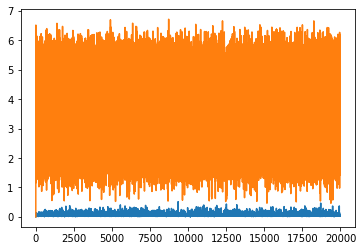

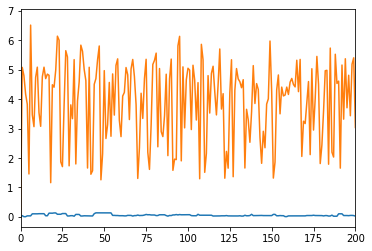

In [14]:
plt.plot(range(0, len(df_rot_water)), df_kab_water.rmse)
plt.plot(range(0, len(df_rot_water)), df_rot_water.rmse)

plt.figure()
plt.plot(range(0, len(df_rot_water)), df_kab_water.rmse)
plt.plot(range(0, len(df_rot_water)), df_rot_water.rmse)

plt.xlim(0, 200)

# Check the average fragment calculation: you should see the different